In [92]:
#importing required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [93]:
# creating Dataframe by importing medical_cost_insurance.csv file
df = pd.read_csv('C:/Users/Rahul/Desktop/Internship/medical_Cost_insurance.csv')

In [94]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [95]:
df.shape

(1338, 7)

In [96]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [97]:
#Checking for Null values in the Data frame
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<AxesSubplot:>

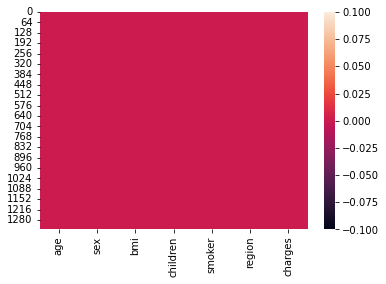

In [98]:
sns.heatmap(df.isna())

No null/Nan values found in df

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


age,children are int64 data type columns.
bmi & charges are float64 data type columns.
sex,smoker,region are object data type columns.

In [100]:
#Finding duplicate rows inside the dataframe
df.duplicated(keep='first').sum()

1

1 duplicate row found in the data frame.

In [101]:
#Removing the duplicate values except for the first occurence
df.drop_duplicates(inplace=True)

In [102]:
#Checking the shape of Dataframe
df.shape

(1337, 7)

The new shape is 1337 rows & 7 columns.

In [103]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [104]:
#Creating list of columns
df.columns.tolist()

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

In [105]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [106]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


Our target variable is charges and rest of the columns are features.

In [107]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

Only two unique values in sex column

In [108]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

Only two unique values in smoker column

In [109]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

Four unique values in region column

In [110]:
#checking value counts in each column
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

18    69
19    67
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64


male      675
female    662
Name: sex, dtype: int64


32.30    13
28.31     9
30.80     8
31.35     8
28.88     8
         ..
46.20     1
23.80     1
44.77     1
32.12     1
30.97     1
Name: bmi, Length: 548, dtype: int64


0    573
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


no     1063
yes     274
Name: smoker, dtype: int64


southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64


16884.92400    1
2117.33885     1
2221.56445     1
19798.05455    1
13063.88300    1
      

No blank values found in data frame

In [111]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


1. No null values are present in any columns
2. No negative values present
4. Mean and median of age and bmi is very close which means they are uniformly distributed

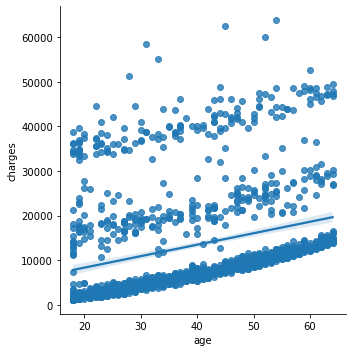

In [112]:
sns.lmplot(x='age',y='charges',data=df,palette='red')

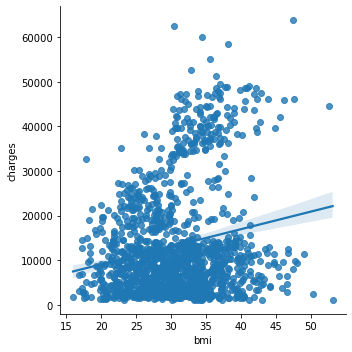

In [113]:
sns.lmplot(x='bmi',y='charges',data=df,palette='red')

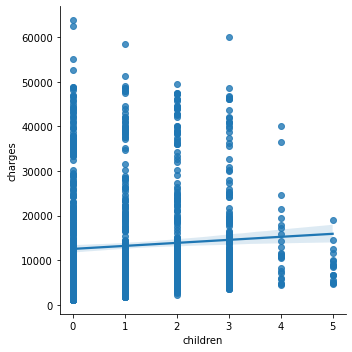

In [114]:
sns.lmplot(x='children',y='charges',data=df,palette='r')

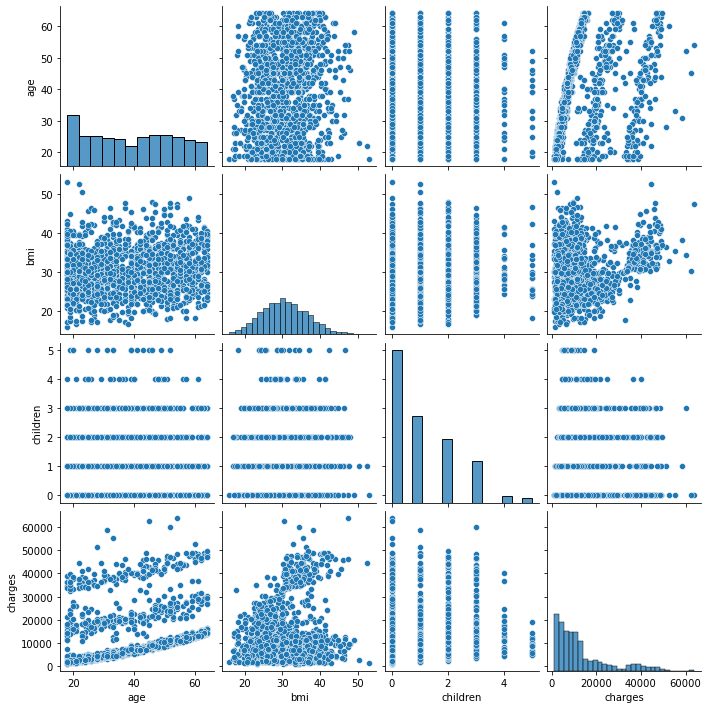

In [115]:
sns.pairplot(data=df,palette='Dark2')

In [116]:
#Separating the numerical cols and categorical cols

#for cat cols

catcols=[]
for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        catcols.append(i)
print(catcols)

#for num cols

numcols=[]
for i in df.dtypes.index:
    if df.dtypes[i] != 'object':
        numcols.append(i)       
print(numcols)

['sex', 'smoker', 'region']
['age', 'bmi', 'children', 'charges']


In [117]:
#cheking skewness
df.skew()

age         0.054781
bmi         0.283914
children    0.937421
charges     1.515391
dtype: float64

<AxesSubplot:xlabel='age', ylabel='Density'>

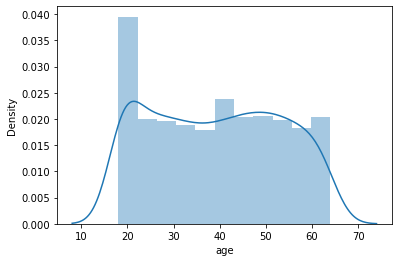

In [122]:
sns.distplot(df['age'])

<AxesSubplot:xlabel='bmi', ylabel='Density'>

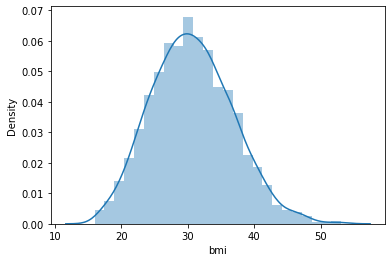

In [123]:
sns.distplot(df['bmi'])

Skewness found in children column

In [118]:
#removing skewness by using Cuberoot method
df['children']=np.cbrt(df['children'])

In [119]:
df.skew()

age         0.054781
bmi         0.283914
children   -0.098682
charges     1.515391
dtype: float64

Skewness reduced in children column

<AxesSubplot:xlabel='children', ylabel='Density'>

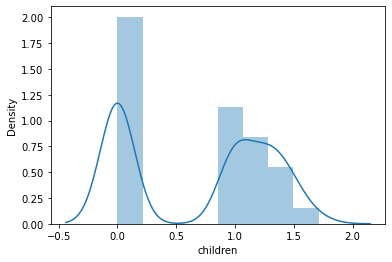

In [121]:
sns.distplot(df['children'])

In [125]:
#checking corelation between varibles
df.corr()

,age,bmi,children,charges
age,1.000000,0.109344,0.047775,0.298308
bmi,0.109344,1.000000,0.016512,0.198401
children,0.047775,0.016512,1.000000,0.072012
charges,0.298308,0.198401,0.072012,1.000000


<AxesSubplot:>

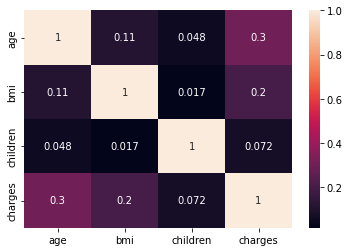

In [127]:
sns.heatmap(df.corr(),annot=True)

No high correlation found in the dataframe

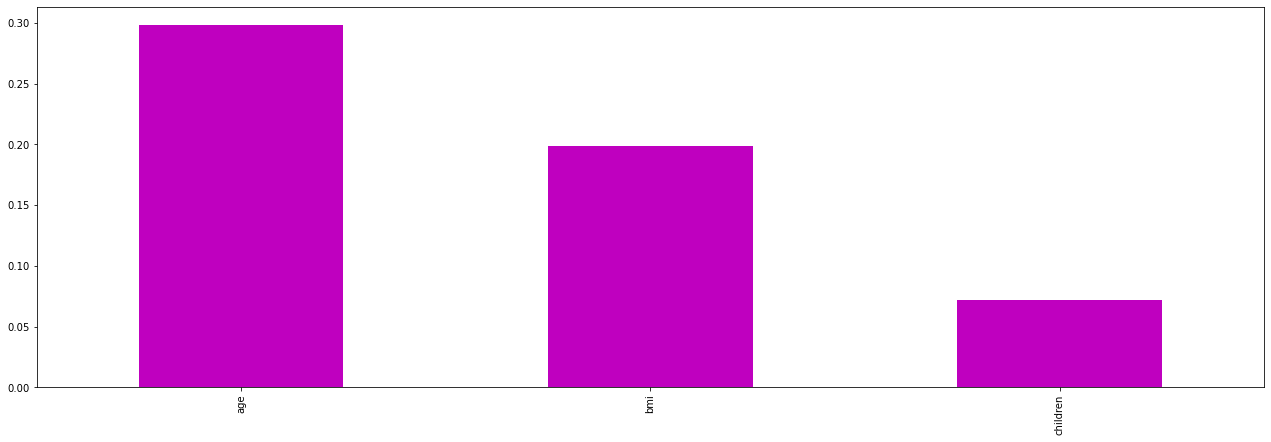

In [130]:
plt.figure(figsize=(22,7))
df.corr()['charges'].sort_values(ascending = False).drop(['charges']).plot(kind='bar',color='m')
plt.show()

Encoding the categorical columns

In [138]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in catcols:
    df[col] = le.fit_transform(df[col])

In [140]:
df[catcols]

,sex,smoker,region
0,0,1,3
1,1,0,2
2,1,0,2
3,1,0,1
4,1,0,1
...,...,...,...
1333,1,0,1
1334,0,0,0
1335,0,0,2
1336,0,0,3


In [142]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.504862,30.663452,0.690560,0.204936,1.516081,13279.121487
std,14.044333,0.500163,6.100468,0.617605,0.403806,1.105208,12110.359656
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.290000,0.000000,0.000000,1.000000,4746.344000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9386.161300
75%,51.000000,1.000000,34.700000,1.259921,0.000000,2.000000,16657.717450
max,64.000000,1.000000,53.130000,1.709976,1.000000,3.000000,63770.428010


Standardization of data

In [144]:
from sklearn.preprocessing import StandardScaler
x=df.drop('charges',axis=1)
y=df['charges']

In [145]:
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,age,sex,bmi,children,smoker,region
0,-1.440418,-1.009771,-0.453160,-1.118544,1.969660,1.343163
1,-1.511647,0.990324,0.509422,0.501220,-0.507702,0.438017
2,-0.799350,0.990324,0.383155,1.217560,-0.507702,0.438017
3,-0.443201,0.990324,-1.305052,-1.118544,-0.507702,-0.467128
4,-0.514431,0.990324,-0.292456,-1.118544,-0.507702,-0.467128
...,...,...,...,...,...,...
1332,0.767704,0.990324,0.050269,1.217560,-0.507702,-0.467128
1333,-1.511647,-1.009771,0.206053,-1.118544,-0.507702,-1.372274
1334,-1.511647,-1.009771,1.014490,-1.118544,-0.507702,0.438017
1335,-1.297958,-1.009771,-0.797524,-1.118544,-0.507702,1.343163


We have scaled the features data with standard scaler to overcome biasness

Checking Variance

In [146]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [147]:
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(x.values,i)
                   for i in range(len(x.columns))]
vif['features']=x.columns
vif

,VIF Values,features
0,1.015854,age
1,1.008882,sex
2,1.040683,bmi
3,1.002998,children
4,1.006636,smoker
5,1.025891,region


VIF is within acceptable range.

# MODELING

In [ ]:
#importing libraries

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

Divding data in train & test parts

In [153]:
maxAccu=0
maxRs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRs = i
print(maxAccu, maxRs)

0.7996558021172124 113


In [154]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=maxRs)

In [158]:
#importing models
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge

Linear Regression

In [160]:
lr=LinearRegression()
lr.fit(x_train,y_train)
plr=lr.predict(x_test)
plr_train=lr.predict(x_train)
print('R2score: ',r2_score(y_test,plr))
print('R2score on training data: ',r2_score(y_train,plr_train)*100)
print('Mean absolute error: ',mean_absolute_error(y_test,plr))
print('Mean Squared error :',mean_squared_error(y_test,plr))
print('Root mean squared error :',np.sqrt(mean_squared_error(y_test,plr)))

R2score:  0.7956707416228928
R2score on training data:  73.77353368632356
Mean absolute error:  3975.2442438500925
Mean Squared error : 31826515.81232225
Root mean squared error : 5641.499429435605


Random Forest Regression

In [161]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
prfr=rfr.predict(x_test)
prfr_train=rfr.predict(x_train)
print('R2score: ',r2_score(y_test,prfr))
print('R2score on training data: ',r2_score(y_train,prfr_train)*100)
print('Mean absolute error: ',mean_absolute_error(y_test,prfr))
print('Mean Squared error :',mean_squared_error(y_test,prfr))
print('Root mean squared error :',np.sqrt(mean_squared_error(y_test,prfr)))

R2score:  0.8705395251496318
R2score on training data:  97.55291563978503
Mean absolute error:  2601.248514296736
Mean Squared error : 20164884.278548427
Root mean squared error : 4490.53273883494


Decision Tree Regression

In [163]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pdtr=dtr.predict(x_test)
pdtr_train=dtr.predict(x_train)
print('R2score: ',r2_score(y_test,pdtr))
print('R2score on training data: ',r2_score(y_train,pdtr_train)*100)
print('Mean absolute error: ',mean_absolute_error(y_test,pdtr))
print('Mean Squared error :',mean_squared_error(y_test,pdtr))
print('Root mean squared error :',np.sqrt(mean_squared_error(y_test,pdtr)))

R2score:  0.755282499706058
R2score on training data:  99.88118265012015
Mean absolute error:  2851.696649082089
Mean Squared error : 38117426.03344042
Root mean squared error : 6173.931165265808


K Nearest Neighbors

In [165]:
knn=KNN()
knn.fit(x_train,y_train)
pknn=knn.predict(x_test)
pknn_train=knn.predict(x_train)
print('R2score: ',r2_score(y_test,pknn))
print('R2score on training data: ',r2_score(y_train,pknn_train)*100)
print('Mean absolute error: ',mean_absolute_error(y_test,pknn))
print('Mean Squared error :',mean_squared_error(y_test,pknn))
print('Root mean squared error :',np.sqrt(mean_squared_error(y_test,pknn)))

R2score:  0.8366850044494684
R2score on training data:  86.52276623327089
Mean absolute error:  3073.165790354478
Mean Squared error : 25438095.99056755
Root mean squared error : 5043.619334423202


Lasso Regression

In [166]:
ls=Lasso()
ls.fit(x_train,y_train)
pls=ls.predict(x_test)
pls_train=ls.predict(x_train)
print('R2score: ',r2_score(y_test,pls))
print('R2score on training data: ',r2_score(y_train,pls_train)*100)
print('Mean absolute error: ',mean_absolute_error(y_test,pls))
print('Mean Squared error :',mean_squared_error(y_test,pls))
print('Root mean squared error :',np.sqrt(mean_squared_error(y_test,pls)))

R2score:  0.7956617840837633
R2score on training data:  73.77352922380697
Mean absolute error:  3975.2162403308007
Mean Squared error : 31827911.04696954
Root mean squared error : 5641.623086219917


Ridge Regression

In [167]:
rd=Ridge()
rd.fit(x_train,y_train)
prd=rd.predict(x_test)
prd_train=rd.predict(x_train)
print('R2score: ',r2_score(y_test,prd))
print('R2score on training data: ',r2_score(y_train,prd_train)*100)
print('Mean absolute error: ',mean_absolute_error(y_test,prd))
print('Mean Squared error :',mean_squared_error(y_test,prd))
print('Root mean squared error :',np.sqrt(mean_squared_error(y_test,prd)))

R2score:  0.7956299486017109
R2score on training data:  73.77346560038993
Mean absolute error:  3977.097062881102
Mean Squared error : 31832869.771339133
Root mean squared error : 5642.06254585494


Selecting the Best model

In [168]:
from sklearn.model_selection import cross_val_score

For LR

In [182]:
scr=cross_val_score(lr,x,y)
print(scr)
print(scr.mean())
print('Diff b/w R2 score & CV score', (r2_score(y_test,plr) - scr.mean())*100)

[0.76099747 0.70735964 0.7776184  0.73451938 0.7534895 ]
0.7467968786350554
Diff b/w R2 score & CV score 4.887386298783736


FOR RFR

In [183]:
scr=cross_val_score(rfr,x,y)
print(scr)
print(scr.mean())
print('Diff b/w R2 score & CV score', (r2_score(y_test,plr) - scr.mean())*100)

[0.85252559 0.76996267 0.86896616 0.83377745 0.85479127]
0.83600463002409
Diff b/w R2 score & CV score -4.033388840119723


For DTR

In [184]:
scr=cross_val_score(dtr,x,y)
print(scr)
print(scr.mean())
print('Diff b/w R2 score & CV score', (r2_score(y_test,plr) - scr.mean())*100)

[0.75574616 0.66162018 0.75313152 0.72482461 0.69893494]
0.7188514813281885
Diff b/w R2 score & CV score 7.681926029470421


FOR KNN

In [185]:
scr=cross_val_score(knn,x,y)
print(scr)
print(scr.mean())
print('Diff b/w R2 score & CV score', (r2_score(y_test,plr) - scr.mean())*100)

[0.82667617 0.75663744 0.841135   0.79858305 0.81767814]
0.8081419597308412
Diff b/w R2 score & CV score -1.247121810794849


FOR LS

In [186]:
scr=cross_val_score(ls,x,y)
print(scr)
print(scr.mean())
print('Diff b/w R2 score & CV score', (r2_score(y_test,plr) - scr.mean())*100)

[0.76100418 0.7073969  0.77759715 0.73451403 0.75349819]
0.7468020908069656
Diff b/w R2 score & CV score 4.886865081592717


For RD

In [176]:
scr=cross_val_score(rd,x,y)
print(scr)
print(scr.mean())
print('Diff b/w R2 score & CV score', (r2_score(y_test,plr) - scr.mean())*100)

[0.76100655 0.70747139 0.77749861 0.73457567 0.75346201]
0.7468028451632852
Diff b/w Accuracy score & CV score 4.886789645960754


Ridge regression is our best model.

# Hyperparameter Tuning

In [187]:
#importing GridseachCV for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [214]:
param={'alpha':[1.0,0.05,0.4,2],
       'fit_intercept':[True,False],
       'solver':['auto','svd','cholesky','lsqr','sag','saga','lbfgs'],
       'positive':[False,True],
      }

In [215]:
gscv = GridSearchCV(Ridge(),param,cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1.0, 0.05, 0.4, 2],
                         'fit_intercept': [True, False],
                         'positive': [False, True],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag',
                                    'saga', 'lbfgs']})

In [217]:
gscv.best_params_

{'alpha': 0.4, 'fit_intercept': True, 'positive': False, 'solver': 'saga'}

These are the best parameters for the Ridge regression model.

In [222]:
#Creating the final model
Final_model=Ridge(alpha=0.4, fit_intercept=True, positive=False, solver='saga')

In [223]:
#Training the final model
Final_model.fit(x_train,y_train)

Ridge(alpha=0.4, solver='saga')

In [224]:
#Final prediction
pred=Final_model.predict(x_test)
print('R2score: ',r2_score(y_test,pred))
print('Mean absolute error: ',mean_absolute_error(y_test,pred))
print('Mean Squared error :',mean_squared_error(y_test,pred))
print('Root mean squared error :',np.sqrt(mean_squared_error(y_test,pred)))

R2score:  0.7956979840814815
Mean absolute error:  3975.599318972493
Mean Squared error : 31822272.501570135
Root mean squared error : 5641.123336851459


The final prediciton model accuracy is 79.56%.

In [225]:
#Saving our model
import joblib
joblib.dump(Final_model,'insurance_costs.pkl')

['insurance_costs.pkl']

In [226]:
#checking if our saved model is working
model = joblib.load('insurance_costs.pkl')

prediction=model.predict(x_test)
prediction

array([ 8907.48789892,  2307.78390598,  7966.90059902,  5362.75040454,
        8821.83830182,  3293.93398344,  8130.09732919, 11914.55209569,
       11152.48553043, 15379.21204889, 34411.21482801,  8594.85655712,
        2457.43012645, 16036.9281061 ,  6339.06703388, 10661.23219698,
       15101.48460161, 13820.28904891, 30298.29007905,  8453.05765427,
       29570.52680351,  6584.22836547,  7157.79325435,  6291.08411759,
        9701.55702842,  7925.08493048, 11528.94272595, 16371.51443281,
       11307.82868999,  5775.98397874, 38907.35695071,  5216.33956128,
        2123.10665034, 36320.19918769, 14342.67248172,  1156.29990235,
       10025.98195023, 11063.646167  , 34139.08243216,  6248.56278024,
       39053.3727254 ,  7030.04072223,  7348.58837548, 29268.04801152,
       34747.26715227,  3384.46564098, 15399.77783242, 10400.681263  ,
       40375.36504666, 34021.32772149,  9288.01878714, 26903.26149418,
        8976.19210639,  5668.63994477, 11194.79818447, 36592.62325826,
      